# Ocena Modelu - Ćwiczenia

### 🔎 Co będziemy oceniać?

W Bajtolandii pojawił się nowy pomysł – urzędnicy zainteresowali się projektem Bajtazara, który przewiduje głośność wybranych mieszkań. 🤖🏠 Postanowili więc zmienić rzeczywistą głośność tych mieszkań i porównać ją z wynikami programu Bajtazara. Czy przewidywania okażą się trafne? Sprawdźmy! 🧐


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier  # importujemy ten kod

np.random.seed(44)
num_samples = 300
num_clusters = 10

x_blob, y_blob = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=6, center_box=(0, 100), random_state=44)

x_coords = np.clip(x_blob[:, 0], 0, 100)
y_coords = np.clip(x_blob[:, 1], 0, 100)

noise = np.sin(x_coords) + np.cos(y_coords) + np.random.normal(0, 1, num_samples)
threshold = 0.1
labels = (noise > threshold).astype(int)

num_houses = 11
X = np.random.uniform(0, 100, num_houses)
Y = np.random.uniform(0, 100, num_houses)

train_data = [np.array([x, y]) for x, y in zip(x_coords, y_coords)]
train_labels = labels
test_data = [np.array([x, y]) for x, y in zip(X, Y)]

test_noise = np.sin(X) + np.cos(Y) + np.random.normal(0,1,num_houses)
threshold = 0.1
test_labels = (test_noise > threshold).astype(int)


#### 🏆 Twoje zadanie

Twoim celem jest znalezienie najlepszego modelu (czyli odpowiedniego $K, oraz możliwie metryki!) oraz podanie argumentów, dlaczego ten wybór jest najlepszy.

#### 📊 Jak to zrobić?

Przetestuj różne wartości $K$.

- Przeanalizuj wyniki za pomocą duuużej ilości wykresów 📈📉, confusion matrix 🧩 itp.

- Porównaj różne wartości i zdecyduj, która jest najlepsza.

- Poniżej znajdziesz zarys kodu – w tym przykładzie $K = 5$, ale ty możesz to zmieniać i szukać idealnej wartości! 🔥

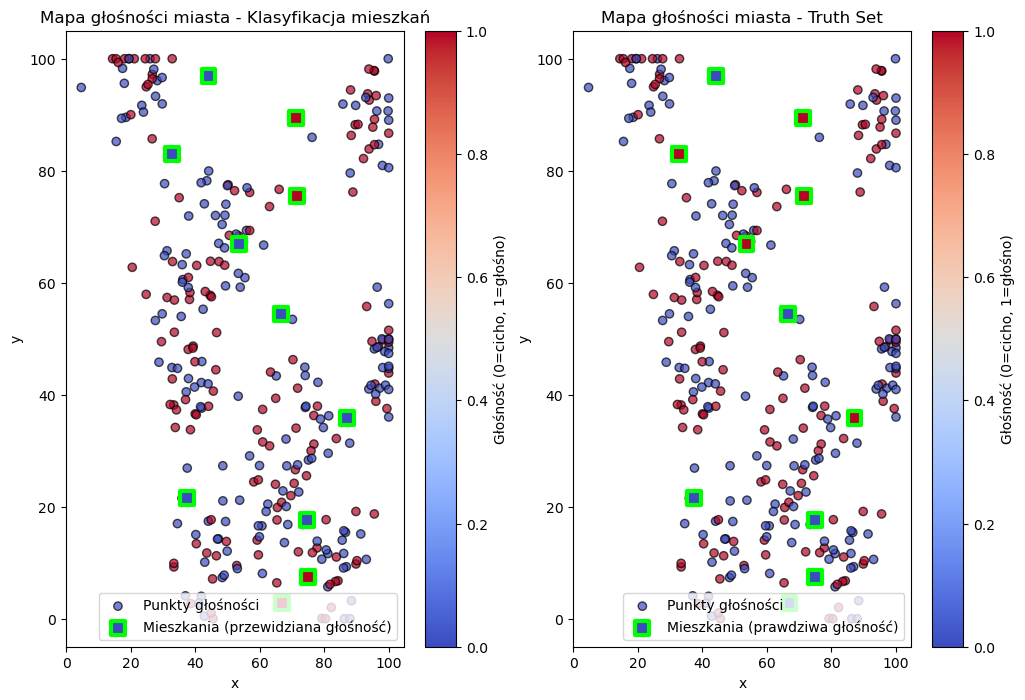

In [ ]:
K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_data, train_labels)

pred_house_labels = knn.predict(test_data)


plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=pred_house_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (przewidziana głośność)")
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Przewidywana głośność")
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=test_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (prawdziwa głośność)")
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Prawdziwa głośność")
plt.legend(loc='lower right')

plt.show()

### 🚀 Nowe Wyzwanie!

#### 📢 Nowe dane z Bajtolandii!
Urzędnicy stwierdzili, że wcześniejsze pomiary były zbyt ogólne. Postanowili więc zainwestować w lepszy sprzęt i teraz mogą mierzyć głośność mieszkań w dokładniejszej skali – od 0 do 5. 🏙️📊

Poprzednie zadanie było trochę uproszczone. W prawdziwym życiu mieszkania nie są tylko głośne albo ciche. Mogą mieć różne poziomy głośności! 🔊🔇

#### 💡 Twoje zadanie:

Zmodyfikuj poprzedni program, aby działał w tej nowej skali.

Ponownie przeprowadź analizę i znajdź najlepsze $K$ dla tej wersji problemu!

Czy uda ci się to zrobić? Powodzenia! 💪


In [81]:
np.random.seed(42)

num_samples = 300
num_clusters = 10

x_blob, y_blob = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=6, center_box=(0, 100), random_state=44)

x_coords = np.clip(x_blob[:, 0], 0, 100)
y_coords = np.clip(x_blob[:, 1], 0, 100)

noise = np.sin(x_coords) + np.cos(y_coords) + np.random.normal(0, 1, num_samples)

final_labels = np.digitize(noise, np.quantile(noise, [0.1, 0.2, 0.4, 0.6, 0.8, 1]), right=True)


num_houses = 51
X = np.random.uniform(0, 100, num_houses)
Y = np.random.uniform(0, 100, num_houses)

train_data = [np.array([x, y]) for x, y in zip(x_coords, y_coords)]
train_labels = final_labels
test_data = [np.array([x, y]) for x, y in zip(X, Y)]

test_noise = np.sin(X) + np.cos(Y) + np.random.normal(0,1,num_houses)
test_labels = np.digitize(test_noise, np.quantile(test_noise, [0.1, 0.2, 0.4, 0.6, 0.8, 1]), right=True)


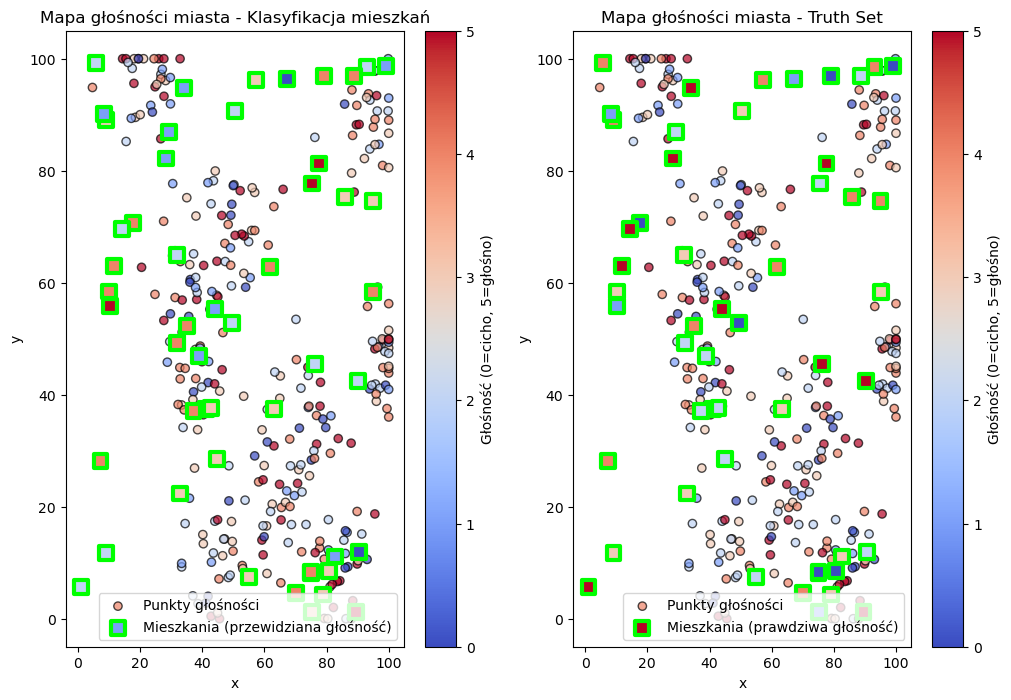

In [ ]:
K = 5
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_data, train_labels)

pred_house_labels = knn.predict(test_data)

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.scatter(x_coords, y_coords, c=train_labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=pred_house_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (przewidziana głośność)")
plt.colorbar(label="Głośność (0=cicho, 5=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Przewidywana głośność mieszkań")
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.scatter(x_coords, y_coords, c=train_labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=test_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (prawdziwa głośność)")
plt.colorbar(label="Głośność (0=cicho, 5=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Prawdziwa głośność mieszkań")
plt.legend(loc='lower right')

plt.show()

### ⭐ Zadanie z gwiazdką!

Czy można ulepszyć klasyczny algorytm KNN? 🤔

Podpowiedź: klasyczny KNN traktuje wszystkich sąsiadów tak samo, ale czy to na pewno najlepszy sposób? W szczególności w nowym zadaniu?

#### 🎯 Spróbuj ulepszyć KNN, na przykład:

- Ważony KNN – gdzie bliżsi sąsiedzi mają większy wpływ na decyzję niż dalsi. 📏📌

- Inna metryka odległości – może Euklidesowa nie jest zawsze najlepsza?

Jeśli masz pomysł na inne ulepszenie – śmiało, przetestuj je i sprawdź, czy rzeczywiście poprawia wyniki! 🚀